In [1]:
import nyroglancer
import h5py
import numpy as np
from PIL import Image

from os import listdir
from os.path import isfile, join

mypath='/media/songbird/Seagate Expansion Drive/multicut_segm'

mypath2='/media/songbird/Seagate Expansion Drive/8bitcrop seq'
mypath3='/media/songbird/Seagate Expansion Drive/proba_map'


multicut =[join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

raw=[join(mypath2, f) for f in listdir(mypath2) if isfile(join(mypath2, f))]
proba_map=[join(mypath3, f) for f in listdir(mypath3) if isfile(join(mypath3, f))]



multicut.sort()
proba_map.sort()
raw.sort()
xs=2100
xe=2300

ys=1000
ye=1200

start=450
end=650


proba_map=proba_map[start:end]
raw=raw[start:end]


proba_map_list=[]

for f in proba_map:
    fil=h5py.File(f, 'r')
    data =fil['/exported_data'][xs:xe,ys:ye, 1:]
    data=np.transpose(data,axes=(1,0,2))
    print data.dtype
    proba_map_list.append(data)
    


/home/songbird/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [2]:
probatuple=tuple(proba_map_list)
proba_final=np.dstack(probatuple)
proba_final=proba_final.astype('float32')

In [3]:
raw_list=[]
i=0
for f in raw:
    imarray=np.array(Image.open(f))
    imarray=imarray[xs:xe,ys:ye]
    imarray=np.reshape(imarray,(imarray.shape[0],imarray.shape[1],1))
    imarray=np.transpose(imarray,axes=(1,0,2))
    raw_list.append(imarray)
    print(i)
    i=i+1

rawtuple=tuple(raw_list)
rawfinal=np.dstack(rawtuple)
rawfinal.shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


(200, 200, 200)

In [4]:
proba_final.shape

(200, 200, 200)

In [5]:
rawfinal.shape

(200, 200, 200)

In [6]:
import nyroglancer
from scipy import ndimage
import numpy as np
import random
import h5py
from skimage import morphology


probmap_threshold = 0.1
edt_threshold = 5
use_edt = True

binary = proba_final.copy()
binary = proba_final > probmap_threshold
edt = ndimage.distance_transform_edt(binary.astype(np.uint8))
seeds = edt > edt_threshold
seeds, num_seeds = ndimage.label(seeds.astype(np.uint32))

In [7]:
if use_edt:
    edt /=float(np.max(edt))
    edt = np.abs(1-edt) # watershed: low values are labeled first
    segmentation = morphology.watershed(((edt)*255).astype(np.uint8), seeds)
else:
    probmap = np.abs(1-probmap)
    segmentation = morphology.watershed(((probmap)*255).astype(np.uint8), seeds)
    

In [8]:
from scipy import spatial
import numpy as np
import networkx
print networkx.__version__
import sys
from scipy.spatial.distance import euclidean

import numpy as np
sys.path.insert(0, '/home/songbird/Desktop/skeleton_tools-master/skeleton_tools')
from skeleton_tools import Skeleton, SkeletonContainer


from skeleton_utils import *
sk_container =SkeletonContainer()
sk_container.read_from_knossos_nml('/home/songbird/Desktop/knossos/annotation.xml')
for sk in sk_container.skeleton_list:
    sk.interpolate_edges()


test=sk_container
for sk in test.skeleton_list:
    sk.shift_skeleton(np.array([-ys,-xe,-start]),'voxel')

1.11


In [9]:
print len(np.unique(segmentation)), 'number of labels'


1934 number of labels


In [10]:
evaluate_segmentation_with_gt_skeletons(segmentation, test)

(6,
 40,
 [12, 69, 163, 193, 335],
 <networkx.classes.graph.Graph at 0x7fc5cd5abc50>)

In [111]:
def gridsearch(skeleton, probmap, raw, probmap_threshold, edt_threshold, use_edt):
    
    binary = proba_final.copy()
    binary = proba_final > probmap_threshold
    edt = ndimage.distance_transform_edt(binary.astype(np.uint8))
    seeds = edt > edt_threshold
    seeds, num_seeds = ndimage.label(seeds.astype(np.uint32))

    if use_edt:
        edt /=float(np.max(edt))
        edt = np.abs(1-edt) # watershed: low values are labeled first
        segmentation = morphology.watershed(((edt)*255).astype(np.uint8), seeds)
    else:
        probmap = np.abs(1-probmap)
        segmentation = morphology.watershed(((probmap)*255).astype(np.uint8), seeds)
        
    res=evaluate_segmentation_with_gt_skeletons(segmentation, test)
    return segmentation,binary, edt, seeds, res
    

In [18]:
table_res=np.zeros((180,4))

In [24]:
proba_map_range=np.arange(0.0, 1.0, 0.1)
edt_range=range(1,10)
use_edt_range=[True,False]

results=[]
for p in proba_map_range:
    for e in edt_range:
        for u in use_edt_range:
            temp=gridsearch(test, proba_final, rawfinal, p,e,u)
            res=tuple([p,e,u,temp])
            results.append(res)
            print(p,e,u)
            


(0.0, 1, True)
(0.0, 1, False)
(0.0, 2, True)
(0.0, 2, False)
(0.0, 3, True)
(0.0, 3, False)
(0.0, 4, True)
(0.0, 4, False)
(0.0, 5, True)
(0.0, 5, False)
(0.0, 6, True)
(0.0, 6, False)
(0.0, 7, True)
(0.0, 7, False)
(0.0, 8, True)
(0.0, 8, False)
(0.0, 9, True)
(0.0, 9, False)
(0.1, 1, True)
(0.1, 1, False)
(0.1, 2, True)
(0.1, 2, False)
(0.1, 3, True)
(0.1, 3, False)
(0.1, 4, True)
(0.1, 4, False)
(0.1, 5, True)
(0.1, 5, False)
(0.1, 6, True)
(0.1, 6, False)
(0.1, 7, True)
(0.1, 7, False)
(0.1, 8, True)
(0.1, 8, False)
(0.1, 9, True)
(0.1, 9, False)
(0.2, 1, True)
(0.2, 1, False)
(0.2, 2, True)
(0.2, 2, False)
(0.2, 3, True)
(0.2, 3, False)
(0.2, 4, True)
(0.2, 4, False)
(0.2, 5, True)
(0.2, 5, False)
(0.2, 6, True)
(0.2, 6, False)
(0.2, 7, True)
(0.2, 7, False)
(0.2, 8, True)
(0.2, 8, False)
(0.2, 9, True)
(0.2, 9, False)
(0.30000000000000004, 1, True)
(0.30000000000000004, 1, False)
(0.30000000000000004, 2, True)
(0.30000000000000004, 2, False)
(0.30000000000000004, 3, True)
(0.300

In [20]:
tuple([5,6,np.array(5)])

(5, 6, array(5))

In [106]:
results[162][3]

(2, 242, [1270, 1539], <networkx.classes.graph.Graph at 0x7fc5677e51d0>)

In [30]:
import pandas as pd

In [33]:
import datetime


todays_date = datetime.datetime.now().date()

pd.date_range(todays_date-datetime.timedelta(10), periods=10, freq='D')


DatetimeIndex(['2018-06-08', '2018-06-09', '2018-06-10', '2018-06-11',
               '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15',
               '2018-06-16', '2018-06-17'],
              dtype='datetime64[ns]', freq='D')

In [38]:
p_list=[r[0] for r in results]
edt_list=[r[1] for r in results]
e_bin=[r[2] for r in results]
mergers_list=[r[3][0] for r in results]
splits_list=[r[3][1] for r in results]

In [50]:
data=np.column_stack((p_list,edt_list,e_bin,mergers_list,splits_list))

In [51]:
df=pd.DataFrame(data, columns=['proba_map_threshold','edt_threshold','use_edt','mergers','splits'])

In [105]:
df[(df.mergers == 2) ]

,proba_map_threshold,edt_threshold,use_edt,mergers,splits
162,0.9,1.0,1.0,2.0,242.0


In [61]:
edt_true=df[(df.mergers > 0) & (df.splits > 0) & (df.use_edt==1.0)]
edt_false=df[(df.mergers > 0) & (df.splits > 0) & (df.use_edt==0.0)]


In [63]:
edt_true.head()

,proba_map_threshold,edt_threshold,use_edt,mergers,splits
0,0.0,1.0,1.0,15.0,14.0
2,0.0,2.0,1.0,15.0,9.0
4,0.0,3.0,1.0,15.0,15.0
6,0.0,4.0,1.0,15.0,16.0
8,0.0,5.0,1.0,15.0,17.0


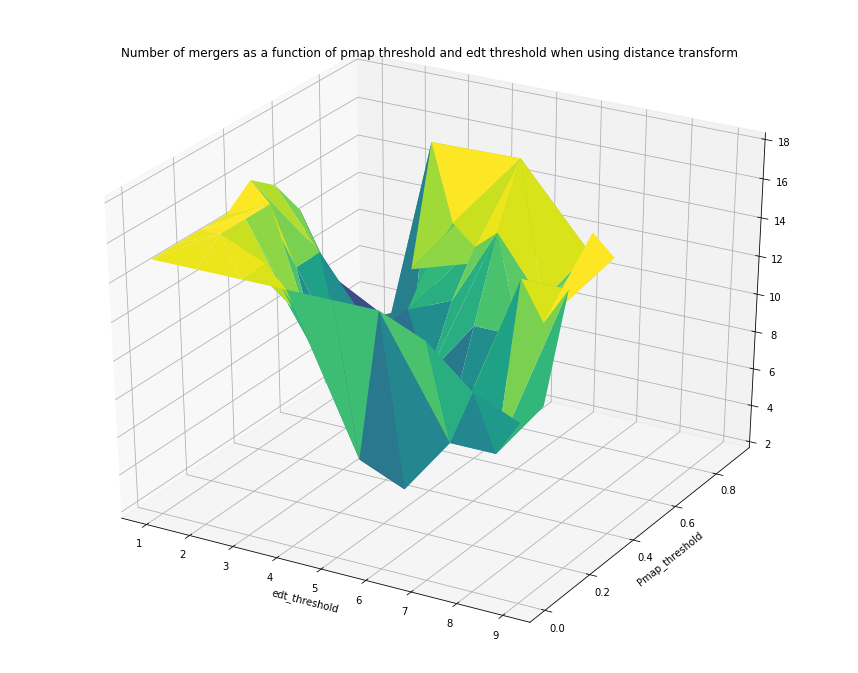

In [88]:
%matplotlib inline


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

# Make data.
X = edt_true.edt_threshold.values
Y = edt_true.proba_map_threshold.values
Z = edt_true.mergers.values

ax=plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
plt.xlabel('edt_threshold')
plt.ylabel('Pmap_threshold')
plt.title('Number of mergers as a function of pmap threshold and edt threshold when using distance transform')
ax.plot_trisurf(X, Y, Z,
                cmap='viridis', edgecolor='none');

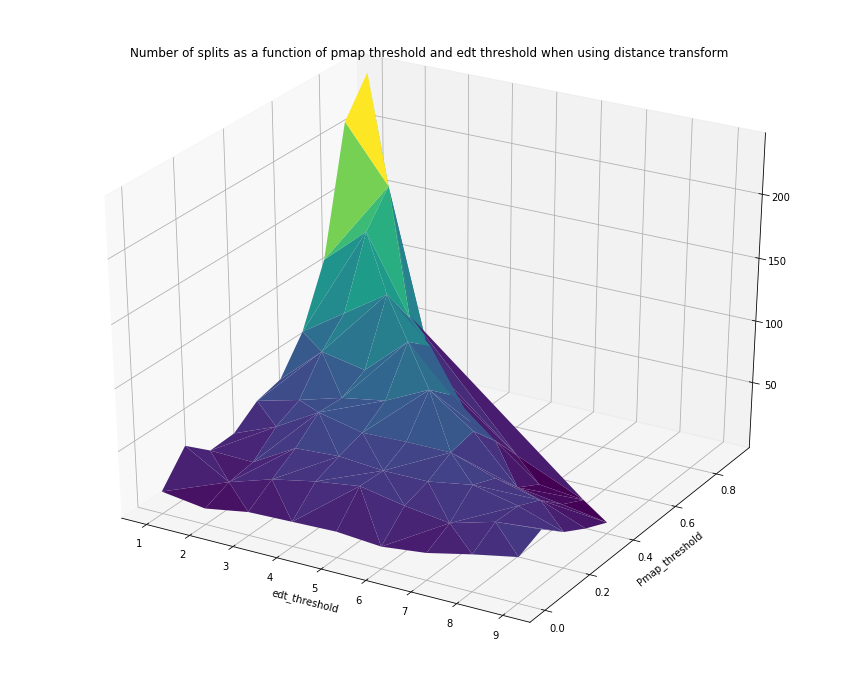

In [90]:


# Make data.
X = edt_true.edt_threshold.values
Y = edt_true.proba_map_threshold.values
Z = edt_true.splits.values

ax=plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
plt.xlabel('edt_threshold')
plt.ylabel('Pmap_threshold')
plt.title('Number of splits as a function of pmap threshold and edt threshold when using distance transform')
ax.plot_trisurf(X, Y, Z,
                cmap='viridis', edgecolor='none');

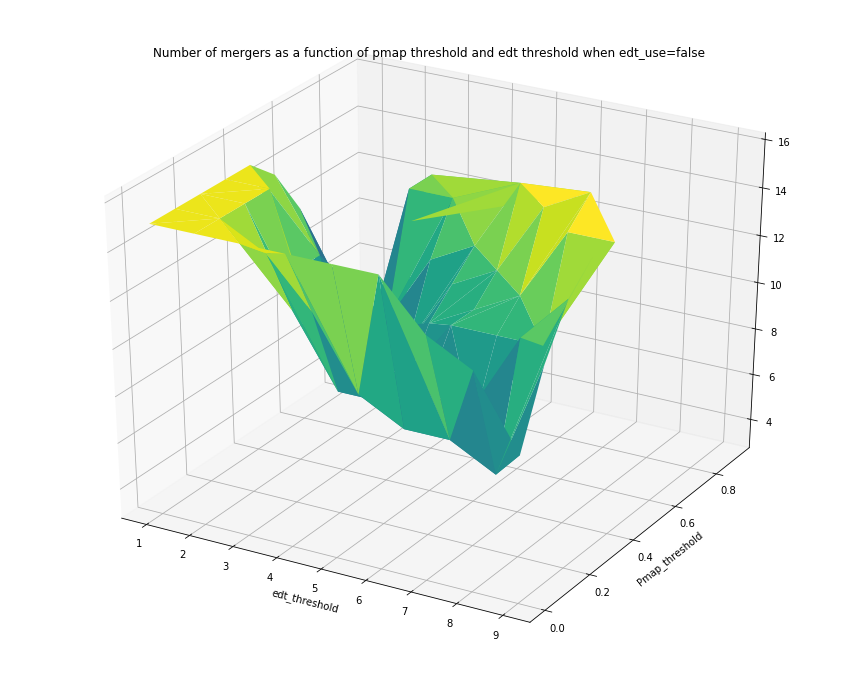

In [94]:


# Make data.
X = edt_false.edt_threshold.values
Y = edt_false.proba_map_threshold.values
Z = edt_false.mergers.values

ax=plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
plt.xlabel('edt_threshold')
plt.ylabel('Pmap_threshold')
plt.title('Number of mergers as a function of pmap threshold and edt threshold when edt_use=false')
ax.plot_trisurf(X, Y, Z,
                cmap='viridis', edgecolor='none');

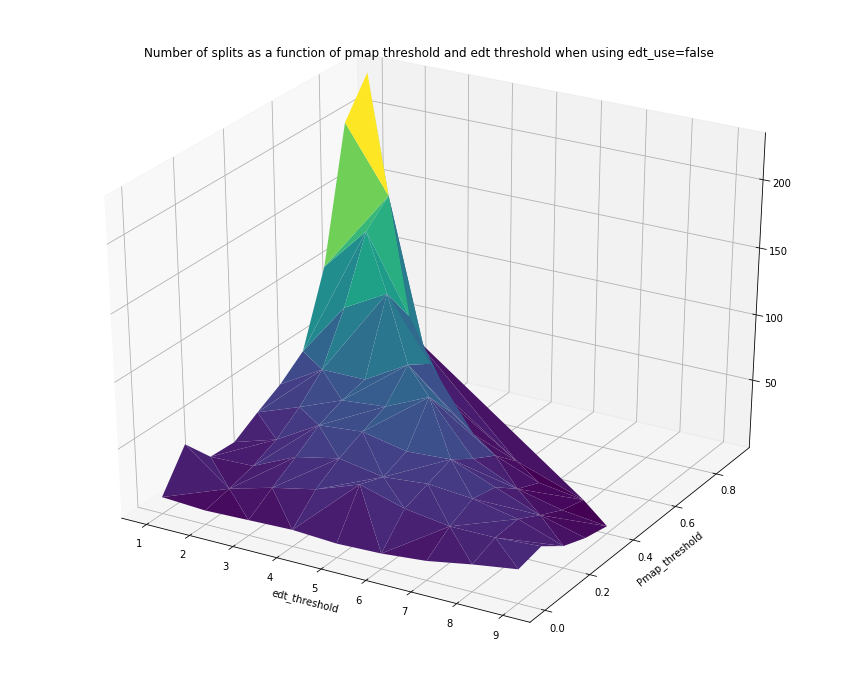

In [93]:


# Make data.
X = edt_false.edt_threshold.values
Y = edt_false.proba_map_threshold.values
Z = edt_false.splits.values

ax=plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
plt.xlabel('edt_threshold')
plt.ylabel('Pmap_threshold')
plt.title('Number of splits as a function of pmap threshold and edt threshold when using edt_use=false')
ax.plot_trisurf(X, Y, Z,
                cmap='viridis', edgecolor='none');

In [112]:
seg,binary, edt, seeds, res =gridsearch(test, proba_final, rawfinal, 0.9,1.0,True)

In [113]:
#proba_final = np.abs(1-proba_final)


viewer = nyroglancer.Viewer()
viewer.add(rawfinal.astype(np.float32)/255., name='raw')
viewer.add(proba_final.astype(np.float32), name='probmap')
viewer.add(binary.astype(np.uint32), name='binary')
viewer.add(edt.astype(np.float32), name='edt')
viewer.add(seeds.astype(np.uint32), name='seeds')
viewer.add(seg.astype(np.uint32), name='segmentation')
viewer.show()
